<a href="https://colab.research.google.com/github/eneser12/PBAN801/blob/main/MultiCollinearity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Path to your file
file_path = '/content/Housing.csv'

# Read the CSV file into a dataframe
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head()


,House,Taxes,Bedrooms,Baths,Size,Lot,Price
0,1,1360,3,2.0,1240,18000,145000
1,2,1050,1,1.0,370,25000,68000
2,3,1010,3,1.5,1130,25000,115000
3,4,830,3,2.0,1120,17000,69000
4,5,2150,3,2.0,1710,14000,163000


I want to get column names, column data types, and number of rows in df.



In [3]:
# Get column names
column_names = df.columns.tolist()

# Get data types of columns
column_data_types = df.dtypes

# Get number of rows
num_rows = len(df)

# Print column names
print("Column Names:")
print(column_names)

# Print data types of columns
print("\nColumn Data Types:")
print(column_data_types)

# Print number of rows
print("\nNumber of Rows:", num_rows)


Column Names:
['House', 'Taxes', 'Bedrooms', 'Baths', 'Size', 'Lot', 'Price']

Column Data Types:
House         int64
Taxes         int64
Bedrooms      int64
Baths       float64
Size          int64
Lot           int64
Price         int64
dtype: object

Number of Rows: 100


drop the column "House"



In [4]:
# Drop the 'House' column
df.drop('House', axis=1, inplace=True)

# Print the modified dataframe
print(df.head())


   Taxes  Bedrooms  Baths  Size    Lot   Price
0   1360         3    2.0  1240  18000  145000
1   1050         1    1.0   370  25000   68000
2   1010         3    1.5  1130  25000  115000
3    830         3    2.0  1120  17000   69000
4   2150         3    2.0  1710  14000  163000


compute correlations and print the correlation matrix for the dataframe df.

In [5]:
# Compute correlations
correlation_matrix = df.corr()

# Print correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
             Taxes  Bedrooms     Baths      Size       Lot     Price
Taxes     1.000000  0.398797  0.550497  0.737905  0.735543  0.823759
Bedrooms  0.398797  1.000000  0.457783  0.573288  0.212039  0.363378
Baths     0.550497  0.457783  1.000000  0.640846  0.333278  0.571165
Size      0.737905  0.573288  0.640846  1.000000  0.534491  0.761262
Lot       0.735543  0.212039  0.333278  0.534491  1.000000  0.713774
Price     0.823759  0.363378  0.571165  0.761262  0.713774  1.000000


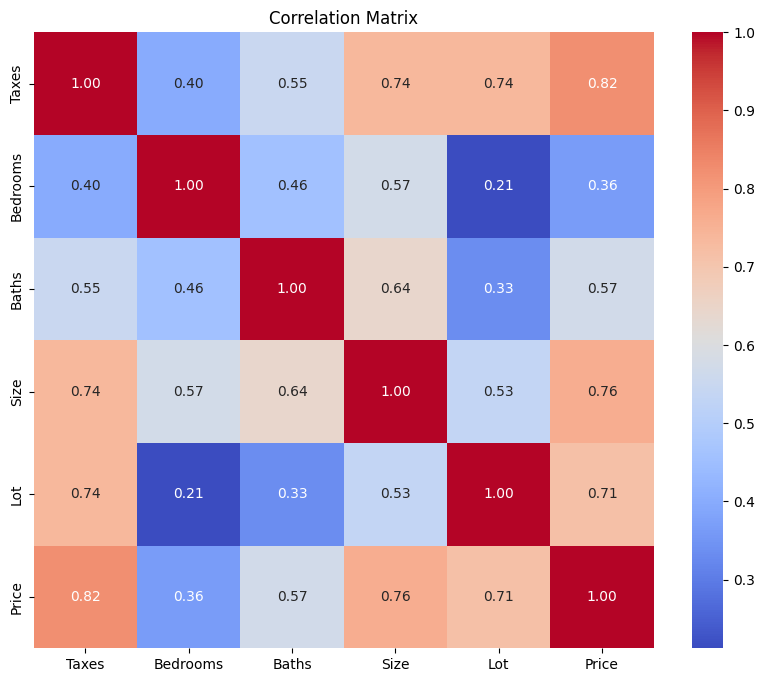

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add title
plt.title('Correlation Matrix')

# Show the plot
plt.show()


Create a linear regression. The dependent variable is "Price". All other variables will be independent variable. Give me the summary of the regression at the end.



In [7]:
import statsmodels.api as sm

# Define independent variables (features)
X = df.drop(columns=['Price'])

# Add a constant to the independent variables matrix (for intercept)
X = sm.add_constant(X)

# Define dependent variable
y = df['Price']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     61.52
Date:                Tue, 20 Feb 2024   Prob (F-statistic):           3.89e-28
Time:                        18:30:12   Log-Likelihood:                -1162.7
No. Observations:                 100   AIC:                             2337.
Df Residuals:                      94   BIC:                             2353.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6633.7997   1.58e+04      0.419      0.6

I want to standardize whole df dataframe using Mu=0 and std=1, exceptfor "Price" attribute. Rename the new dataframe as dfstd.



In [8]:
from sklearn.preprocessing import StandardScaler

# Create a copy of the dataframe
dfstd = df.copy()

# Exclude the "Price" attribute
features_to_standardize = dfstd.drop(columns=['Price'])

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_to_standardize)

# Replace the original features with the standardized features
dfstd[features_to_standardize.columns] = scaled_features

# Print the first few rows of the standardized dataframe
print(dfstd.head())


      Taxes  Bedrooms     Baths      Size       Lot   Price
0 -0.306904  0.015252  0.214535 -0.516485 -0.167068  145000
1 -0.615601 -3.035074 -1.735780 -2.085963  0.658250   68000
2 -0.655433  0.015252 -0.760623 -0.714925  0.658250  115000
3 -0.834676  0.015252  0.214535 -0.732965 -0.284970   69000
4  0.479775  0.015252  0.214535  0.331395 -0.638678  163000


now recreate the same regression on dfstd.

In [9]:
# Define independent variables (features) from the standardized dataframe
X_std = dfstd.drop(columns=['Price'])

# Add a constant to the independent variables matrix (for intercept)
X_std = sm.add_constant(X_std)

# Fit the linear regression model on the standardized data
model_std = sm.OLS(y, X_std).fit()

# Print the summary of the regression on standardized data
print(model_std.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     61.52
Date:                Tue, 20 Feb 2024   Prob (F-statistic):           3.89e-28
Time:                        18:34:08   Log-Likelihood:                -1162.7
No. Observations:                 100   AIC:                             2337.
Df Residuals:                      94   BIC:                             2353.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.267e+05   2798.063     45.281      0.0

Now I want to understand the MULTICOLLINEARITY issue. To this end, I will do the following:

dfstdfor this regression, also compute VIF factors.

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_std.columns
vif_data["VIF"] = [variance_inflation_factor(X_std.values, i) for i in range(len(X_std.columns))]

# Print the VIF dataframe
print("Variance Inflation Factors (VIF):")
print(vif_data)


Variance Inflation Factors (VIF):
    Feature       VIF
0     const  1.000000
1     Taxes  3.558122
2  Bedrooms  1.550092
3     Baths  1.799740
4      Size  3.102130
5       Lot  2.249932


drop "Bedroom" attribute and rerun the regression on dfstd

In [11]:
# Drop the "Bedroom" attribute from the standardized dataframe
X_std.drop(columns=['Bedrooms'], inplace=True)

# Fit the linear regression model on the modified standardized data
model_std_without_bedrooms = sm.OLS(y, X_std).fit()

# Print the summary of the regression on modified standardized data
print(model_std_without_bedrooms.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     76.15
Date:                Tue, 20 Feb 2024   Prob (F-statistic):           8.63e-29
Time:                        18:45:25   Log-Likelihood:                -1163.5
No. Observations:                 100   AIC:                             2337.
Df Residuals:                      95   BIC:                             2350.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.267e+05   2805.163     45.166      0.0

drop Baths  attribute as well then rerun.

In [13]:
# Drop the "Bedrooms" and "Baths" attributes from the standardized dataframe
X_std.drop(columns=[ 'Baths'], inplace=True)

# Fit the linear regression model on the modified standardized data
model_std_without_bedrooms_baths = sm.OLS(y, X_std).fit()

# Print the summary of the regression on modified standardized data
print(model_std_without_bedrooms_baths.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     99.65
Date:                Tue, 20 Feb 2024   Prob (F-statistic):           2.25e-29
Time:                        18:47:09   Log-Likelihood:                -1164.6
No. Observations:                 100   AIC:                             2337.
Df Residuals:                      96   BIC:                             2348.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.267e+05   2821.598     44.903      0.0

In [15]:
def forward_selection(df, target_column):
    remaining_features = set(df.columns)
    remaining_features.remove(target_column)
    selected_features = []
    best_bic = np.inf
    best_adj_r2 = -np.inf
    best_model = None

    while remaining_features:
        bic_values = []
        adj_r2_values = []
        for feature in remaining_features:
            X = df[selected_features + [feature]]
            X = sm.add_constant(X)
            y = df[target_column]
            model = sm.OLS(y, X).fit()
            bic = model.bic
            adj_r2 = model.rsquared_adj
            bic_values.append(bic)
            adj_r2_values.append(adj_r2)

            if bic < best_bic:
                best_bic = bic
                best_feature_bic = feature
                best_model_bic = model

            if adj_r2 > best_adj_r2:
                best_adj_r2 = adj_r2
                best_feature_adj_r2 = feature
                best_model_adj_r2 = model

        if best_bic < best_adj_r2:
            selected_features.append(best_feature_bic)
            remaining_features.remove(best_feature_bic)
            print("Selected Features:", selected_features)
            print("BIC:", bic_values)
            print()
            best_bic = np.inf
            best_adj_r2 = -np.inf
        else:
            selected_features.append(best_feature_adj_r2)
            remaining_features.remove(best_feature_adj_r2)
            print("Selected Features:", selected_features)
            print("BIC:", bic_values)
            print()
            best_bic = np.inf
            best_adj_r2 = -np.inf

    return selected_features, best_model_adj_r2.bic, best_model_adj_r2.rsquared_adj

# Run forward selection procedure
selected_features, best_bic, best_adj_r2 = forward_selection(df, 'Price')

print("Selected Features:", selected_features)
print("Best BIC:", best_bic)
print("Best Adjusted R-squared:", best_adj_r2)


Selected Features: ['Taxes']
BIC: [2408.6569681765745, 2366.384206243863, 2440.3980786100437, 2465.7232038753154, 2393.2487240953565]

Selected Features: ['Taxes', 'Size']
BIC: [2362.77441536649, 2364.607178277336, 2370.538649419299, 2353.465785628358]

Selected Features: ['Taxes', 'Size', 'Lot']
BIC: [2347.654975087132, 2357.1042217975523, 2356.11939787522]

Selected Features: ['Taxes', 'Size', 'Lot', 'Baths']
BIC: [2350.0446236616626, 2351.217005794441]

Selected Features: ['Taxes', 'Size', 'Lot', 'Baths', 'Bedrooms']
BIC: [2353.084734886655]

Selected Features: ['Taxes', 'Size', 'Lot', 'Baths', 'Bedrooms']
Best BIC: 2353.084734886655
Best Adjusted R-squared: 0.7534967253107417
